## Key Requirements for the iRF scikit-learn implementation

* The following is a documentation of the main requirements for the iRF implementation

## Typical Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

# Just importing pandas to display the dataframe nicely in jupyter
# We should not be using it as a dependency in any of our utils 
# or other developed functions
import pandas as pd

# Import our custom utilities
from imp import reload
from utils import utils
reload(utils)

RANDOM_STATE_SPLIT         = 1001
RANDOM_STATE_CLASSIFIER    = 1039

## Step 1: Fit the Initial Random Forest

* Just fit every feature with equal weights per the usual random forest code e.g. DecisionForestClassifier in scikit-learn

In [2]:
# Load the iris data
iris = load_iris()

# Create the train-test datasets
X_train, X_test, y_train, y_test = train_test_split(iris.data
                                                    , iris.target
                                                    , random_state = RANDOM_STATE_SPLIT)

# Just fit a simple random forest classifier with 2 decision trees
rf = RandomForestClassifier(n_estimators = 2
                            , random_state = RANDOM_STATE_CLASSIFIER)

# fit the classifier
rf.fit(X = X_train, y = y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=False, random_state=1039,
            verbose=0, warm_start=False)

## Check out the data

In [3]:
print("Training feature dimensions", X_train.shape, sep = ":\n")
print("\n")
print("Training outcome dimensions", y_train.shape, sep = ":\n")
print("\n")
print("Test feature dimensions", X_test.shape, sep = ":\n")
print("\n")
print("Test outcome dimensions", y_test.shape, sep = ":\n")
print("\n")
print("first 10 rows of the training set features", X_train[:10], sep = ":\n")
print("\n")
print("first 10 rows of the training set outcomes", y_train[:10], sep = ":\n")

Training feature dimensions:
(112, 4)


Training outcome dimensions:
(112,)


Test feature dimensions:
(38, 4)


Test outcome dimensions:
(38,)


first 10 rows of the training set features:
[[ 5.4  3.7  1.5  0.2]
 [ 7.2  3.   5.8  1.6]
 [ 5.1  2.5  3.   1.1]
 [ 5.5  3.5  1.3  0.2]
 [ 6.7  3.3  5.7  2.1]
 [ 5.2  2.7  3.9  1.4]
 [ 5.6  2.8  4.9  2. ]
 [ 4.9  3.1  1.5  0.1]
 [ 5.8  2.6  4.   1.2]
 [ 6.3  2.5  4.9  1.5]]


first 10 rows of the training set outcomes:
[0 2 1 0 2 1 2 0 1 1]


So we have 
* 4 features
* 112 observations (training set)
* 3 classes

## Step 2: For each Tree get core leaf node features

* For each decision tree in the classifier, get:
    * The list of leaf nodes
    * Depth of the leaf node    
    * Leaf node predicted class i.e. {0, 1}
    * Probability of predicting class in leaf node
    * Number of observations in the leaf node i.e. weight of node

### Get the 2 Decision trees to use for testing

In [4]:
# Import our custom utilities
from imp import reload
from utils import utils
reload(utils)

<module 'utils.utils' from '/Users/shamindras/PERSONAL/LEARNING/REPOS/scikit-learn-sandbox/jupyter/utils/utils.py'>

In [5]:
estimator0 = rf.estimators_[0] # First tree
estimator1 = rf.estimators_[1] # Second tree

## Design the single function to get the key tree information

## Get data from the first and second decision tree

In [6]:
tree_dat0 = utils.getTreeData(X_train = X_train, dtree = estimator0, root_node_id = 0)
tree_dat1 = utils.getTreeData(X_train = X_train, dtree = estimator1, root_node_id = 0)

## Decision Tree 0 (First) - Get output

In [7]:
# utils.prettyPrintDict(inp_dict = tree_dat0)

### Check the output against the decision tree graph

In [8]:
# Now plot the trees individually
# utils.draw_tree(inp_tree = estimator0)

## Decision Tree 1 (Second) - Get output

### Check the output against the decision tree graph

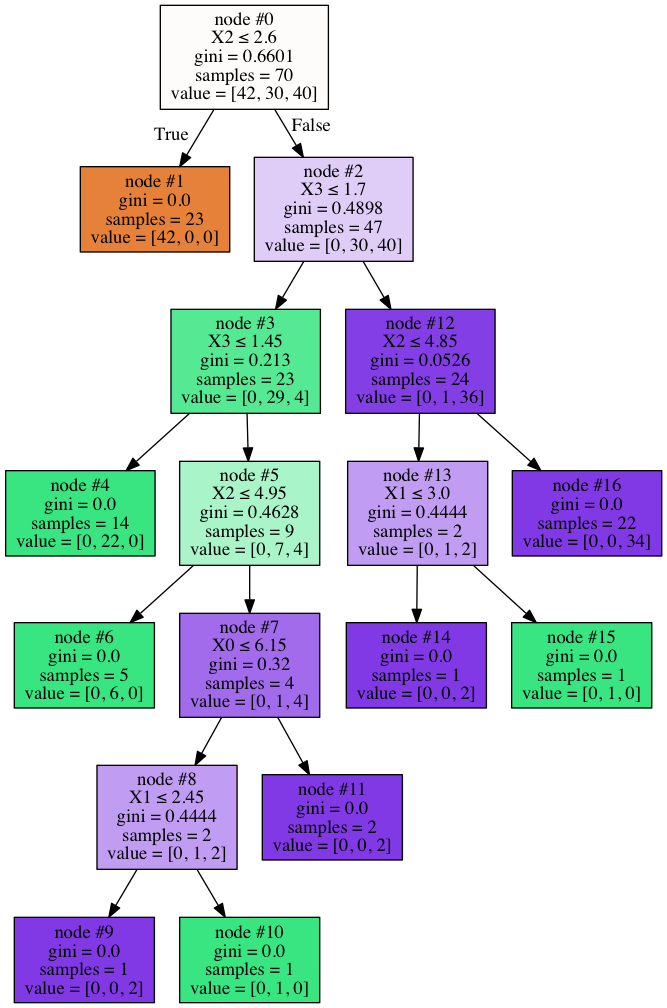

In [9]:
# Now plot the trees individually
utils.draw_tree(decision_tree = estimator1)

In [10]:
utils.prettyPrintDict(inp_dict = tree_dat1)

{   'all_leaf_node_classes': [0, 1, 1, 2, 1, 2, 2, 1, 2],
    'all_leaf_node_paths': [   array([0, 1]),
                               array([0, 2, 3, 4]),
                               array([0, 2, 3, 5, 6]),
                               array([0, 2, 3, 5, 7, 8, 9]),
                               array([ 0,  2,  3,  5,  7,  8, 10]),
                               array([ 0,  2,  3,  5,  7, 11]),
                               array([ 0,  2, 12, 13, 14]),
                               array([ 0,  2, 12, 13, 15]),
                               array([ 0,  2, 12, 16])],
    'all_leaf_node_values': [   array([[42,  0,  0]]),
                                array([[ 0, 22,  0]]),
                                array([[0, 6, 0]]),
                                array([[0, 0, 2]]),
                                array([[0, 1, 0]]),
                                array([[0, 0, 2]]),
                                array([[0, 0, 2]]),
                                array([[0, 1, 0]]

In [11]:
# Count the number of samples passing through the leaf nodes
sum(tree_dat1['tot_leaf_node_values'])

112

## Step 3: Get the Gini Importance of Weights for the Random Forest 

* For the first random forest we just need to get the Gini Importance of Weights

### Step 3.1 Get them numerically - most important

In [12]:
feature_importances = rf.feature_importances_
std = np.std([dtree.feature_importances_ for dtree in rf.estimators_]
             , axis=0)
feature_importances_rank_idx = np.argsort(feature_importances)[::-1]

# Check that the feature importances are standardized to 1
print(sum(feature_importances))

1.0


### Step 3.2 Display Feature Importances Graphically (just for interest)

Feature ranking:
1. feature 3 (0.630610)
2. feature 2 (0.321840)
3. feature 1 (0.028378)
4. feature 0 (0.019172)


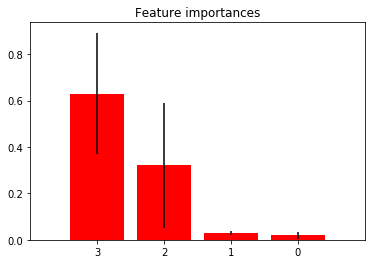

In [13]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1
                                   , feature_importances_rank_idx[f]
                                   , feature_importances[feature_importances_rank_idx[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1])
        , feature_importances[feature_importances_rank_idx]
        , color="r"
        , yerr = std[feature_importances_rank_idx], align="center")
plt.xticks(range(X_train.shape[1]), feature_importances_rank_idx)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Putting it all together

* Create a dictionary object to include all of the random forest objects 

In [14]:
# CHECK: If the random forest objects are going to be really large in size
#        we could just omit them and only return our custom summary outputs

rf_metrics = utils.getValidationMetrics(rf, y_true = y_test, X_test = X_test)
all_rf_outputs = {"rf_obj" : rf,
                 "feature_importances" : feature_importances,
                 "feature_importances_rank_idx" : feature_importances_rank_idx,
                 "rf_metrics" : rf_metrics}

In [15]:
# CHECK: The following should be paralellized!
# CHECK: Whether we can maintain X_train correctly as required
for idx, dtree in enumerate(rf.estimators_):
    dtree_out = utils.getTreeData(X_train = X_train, dtree = dtree, root_node_id = 0)
    # Append output to dictionary
    all_rf_outputs["dtree" + str(idx)] = dtree_out

## Check the final dictionary of outputs

In [17]:
utils.prettyPrintDict(inp_dict = all_rf_outputs)

{   'dtree0': {   'all_leaf_node_classes': [0, 1, 1, 2, 1, 2, 2, 1, 2],
                  'all_leaf_node_paths': [   array([0, 1]),
                                             array([0, 2, 3, 4]),
                                             array([0, 2, 3, 5, 6, 7]),
                                             array([0, 2, 3, 5, 6, 8]),
                                             array([ 0,  2,  3,  5,  9, 10]),
                                             array([ 0,  2,  3,  5,  9, 11]),
                                             array([ 0,  2, 12, 13, 14]),
                                             array([ 0,  2, 12, 13, 15]),
                                             array([ 0,  2, 12, 16])],
                  'all_leaf_node_values': [   array([[41,  0,  0]]),
                                              array([[ 0, 17,  0]]),
                                              array([[0, 1, 0]]),
                                              array([[0, 0, 4]]),
             